# Explore here

In [14]:
#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.colors as mcolors
import os

from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score



In [15]:
csv_base = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
pd.read_csv(csv_base, sep=";", encoding= "utf-8").to_csv('../data/winequality-red.csv', index=False)


In [16]:
df = pd.read_csv("../data/winequality-red.csv")
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [17]:
#Dimensiones del DataFrame
df.shape

(1599, 12)

In [18]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
#Mostrar resumen estadístico básico del dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
#Comprobación de nulos
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:
#Mostrar duplicados del dataset
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Hay un total de {num_duplicados} duplicados en el Dataset")

Hay un total de 240 duplicados en el Dataset


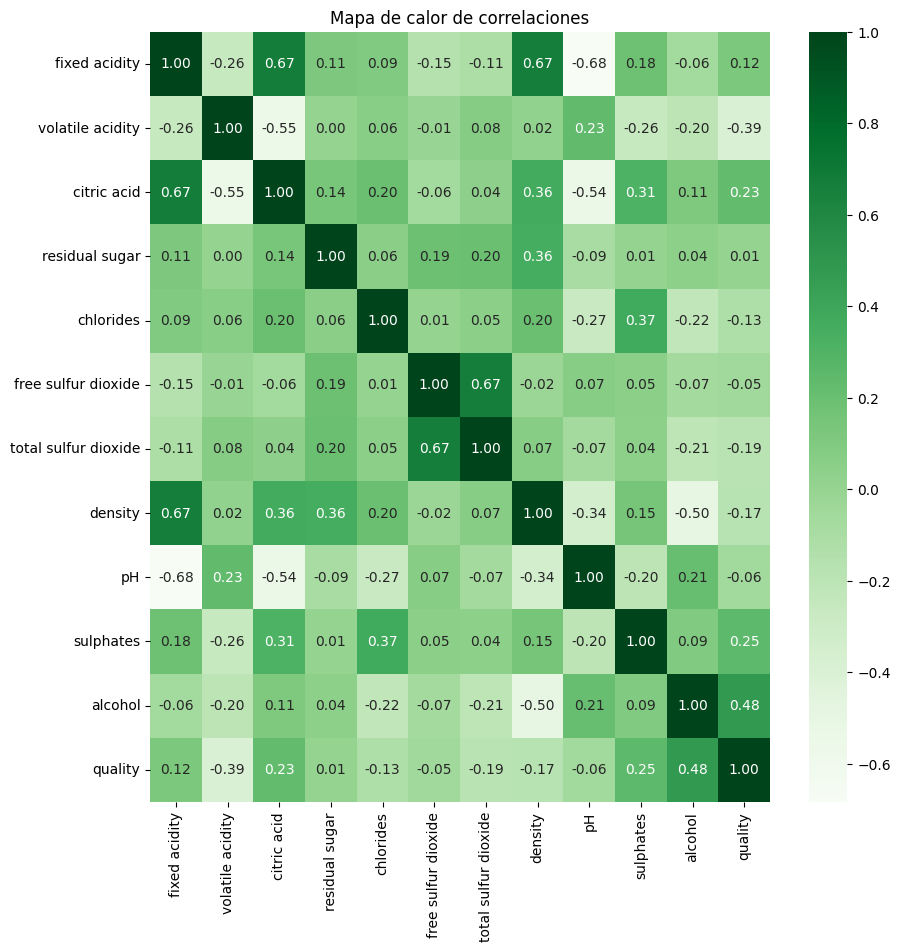

In [22]:
#Vemos correlación en el dataset
num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

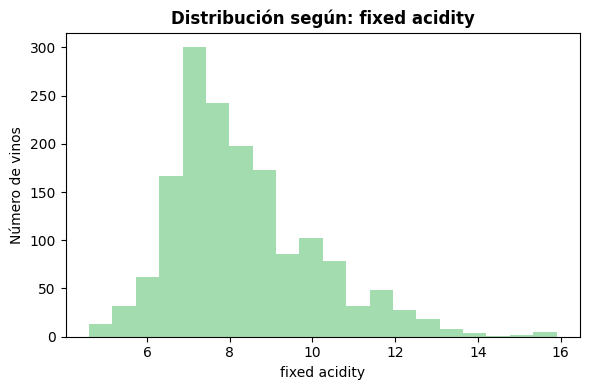

--- fixed acidity ---
fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
14.3     1
12.1     1
15.9     1
4.9      1
5.5      1
Name: count, Length: 96, dtype: int64




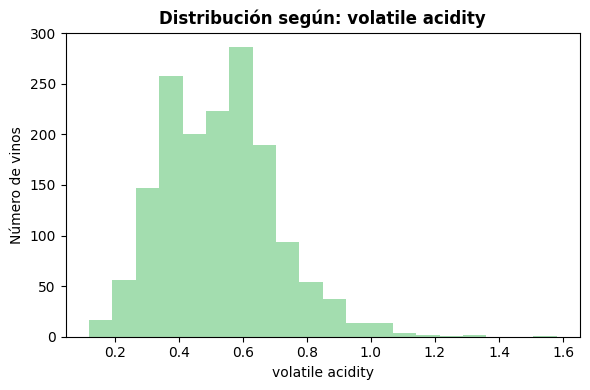

--- volatile acidity ---
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.580    38
         ..
1.005     1
0.955     1
1.580     1
1.180     1
0.895     1
Name: count, Length: 143, dtype: int64




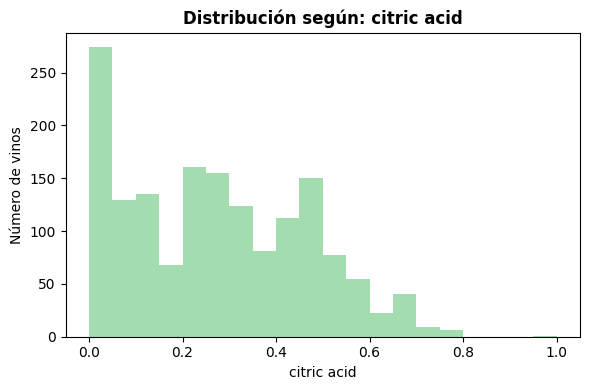

--- citric acid ---
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.79      1
0.71      1
0.72      1
0.75      1
0.78      1
Name: count, Length: 80, dtype: int64




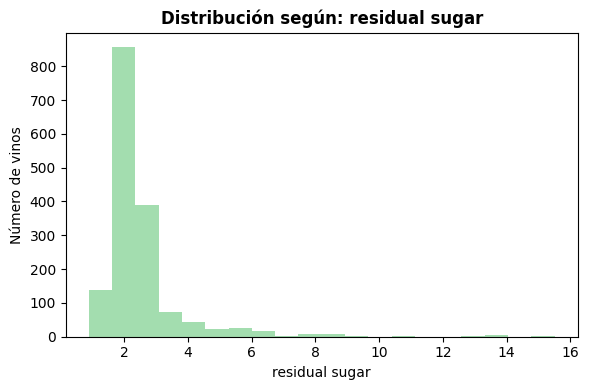

--- residual sugar ---
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
12.90      1
5.40       1
3.75       1
5.70       1
13.90      1
Name: count, Length: 91, dtype: int64




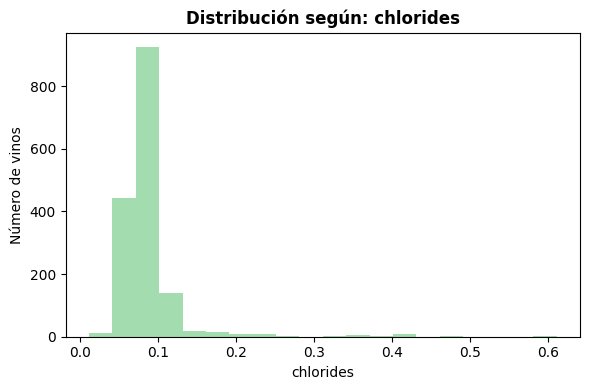

--- chlorides ---
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.168     1
0.267     1
0.169     1
0.235     1
0.230     1
Name: count, Length: 153, dtype: int64




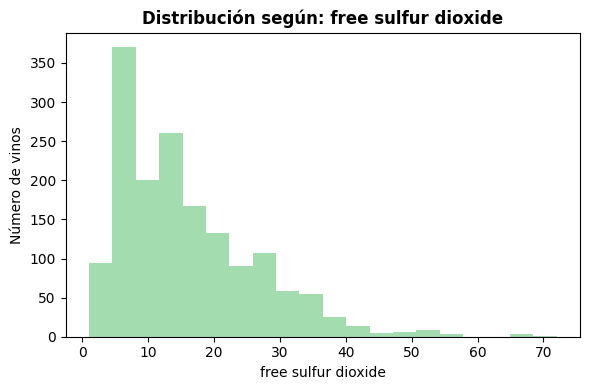

--- free sulfur dioxide ---
free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
23.0     32
26.0     32
20.0     30
27.0     29
25.0     24
28.0     23
29.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
33.0     11
36.0     11
38.0      9
41.0      7
40.0      6
39.0      5
51.0      4
48.0      4
45.0      3
52.0      3
37.0      3
42.0      3
1.0       3
43.0      3
50.0      2
68.0      2
55.0      2
37.5      2
40.5      1
47.0      1
2.0       1
46.0      1
54.0      1
5.5       1
57.0      1
53.0      1
72.0      1
66.0      1
Name: count, dtype: int64




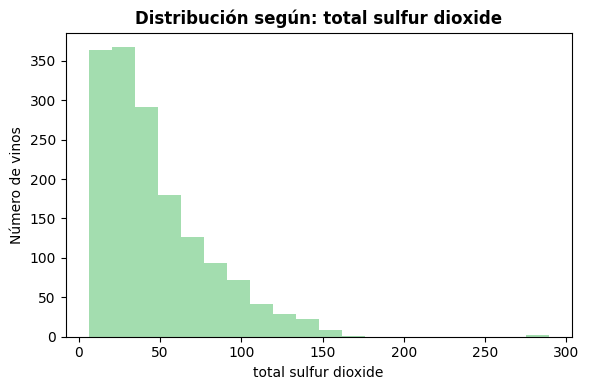

--- total sulfur dioxide ---
total sulfur dioxide
28.0     43
24.0     36
18.0     35
15.0     35
23.0     34
         ..
152.0     1
139.0     1
278.0     1
160.0     1
289.0     1
Name: count, Length: 144, dtype: int64




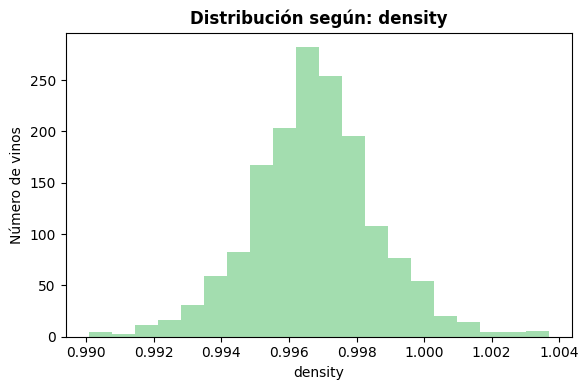

--- density ---
density
0.99720    36
0.99760    35
0.99680    35
0.99800    29
0.99620    28
           ..
0.99474     1
0.99483     1
0.99314     1
0.99380     1
0.99651     1
Name: count, Length: 436, dtype: int64




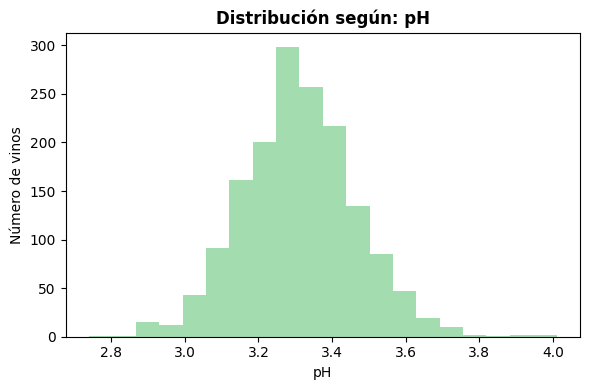

--- pH ---
pH
3.30    57
3.36    56
3.26    53
3.39    48
3.38    48
        ..
2.86     1
2.87     1
3.74     1
3.70     1
2.90     1
Name: count, Length: 89, dtype: int64




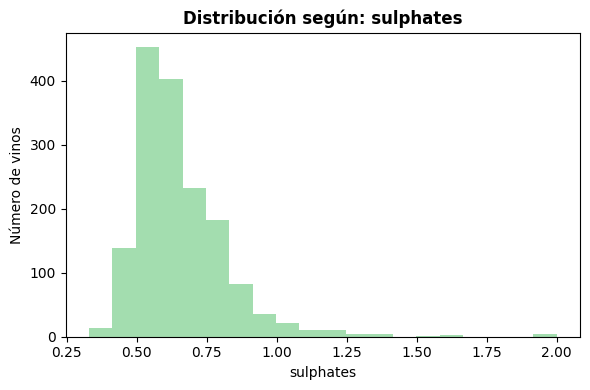

--- sulphates ---
sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.16     1
1.34     1
1.15     1
1.33     1
1.01     1
Name: count, Length: 96, dtype: int64




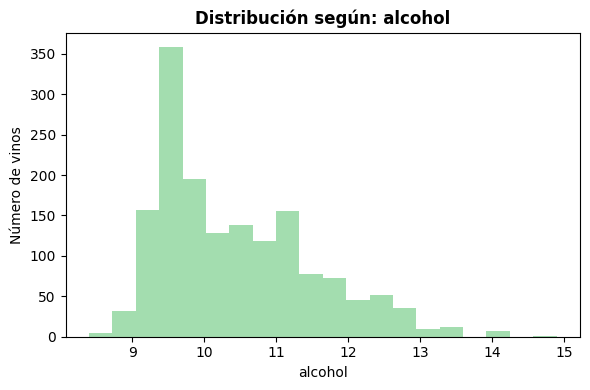

--- alcohol ---
alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64




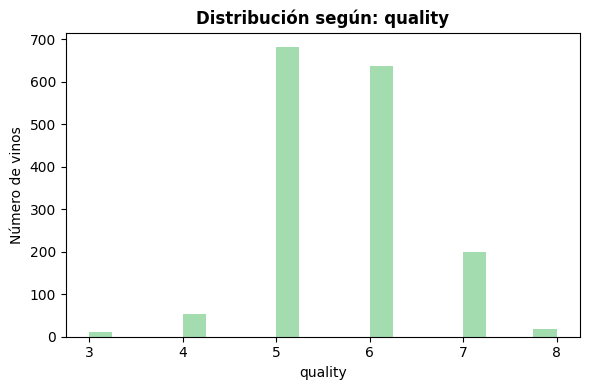

--- quality ---
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64




In [23]:
#Graficamos los valores que son del tipo -numérico- para visualizar su distribución
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color="#7CCF8E", alpha=0.7)
    plt.title(f"Distribución según: {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col)
    plt.ylabel("Número de vinos")
    plt.tight_layout()
    plt.show()
        
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

- ¿Qué variables influyen para que un vino sea de media o alta calidad?

In [24]:
#Distribución de calidad del vino según el dataset
conditiones = [(df["quality"] <= 4), (df["quality"].between(5, 6)), (df["quality"] >= 7)]
clase = ["alta", "media", "baja"]

df["clase"] = np.select(condiciones, clase, default="NA")
print(df["clase"].value_counts())

NameError: name 'condiciones' is not defined

In [ ]:
#Buscamos los valores que se hacen a un vino de "alta", "media" y "baja" calidad, con la media de sus valores
for clase in sorted(df["label"].unique()):
    print(f"\n--- Clase {clase} ---")
    subset = df[df["label"] == clase]
    display(subset.select_dtypes(include="number").mean().round(3))

KeyError: 'label'

- Asi vemos qué características son las comunes según la calidad (alta, media y baja) de cada vino (usando la media de valores)

In [ ]:
#Dividimos datos para test
X = df.drop(["quality", "label"], axis=1).select_dtypes(include=["int64", "float64"])

labelenc = LabelEncoder()
y = labelenc.fit_transform(df["label"])
print("Clases:", labelenc.classes_)

KeyError: "['label'] not found in axis"

In [ ]:
count = Counter(y)
max_v = max(count.values())
objetivo = {cls: max_v for cls in count.keys()}

smote = SMOTE(sampling_strategy=objetivo, random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(Counter(y_res))

Counter({np.int64(2): 1319, np.int64(0): 1319, np.int64(1): 1319})


In [ ]:
#División Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
#Train KNN
t_knn = KNeighborsClassifier()
t_knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print("Reporte de clasificación:\n",
      classification_report(y_test, y_pred, target_names=labelenc.classes_))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

        alta       0.77      0.93      0.84       264
        baja       0.79      0.94      0.86       264
       media       0.84      0.50      0.62       264

    accuracy                           0.79       792
   macro avg       0.80      0.79      0.77       792
weighted avg       0.80      0.79      0.77       792

Matriz de confusión:
 [[246   5  13]
 [  3 249  12]
 [ 70  63 131]]


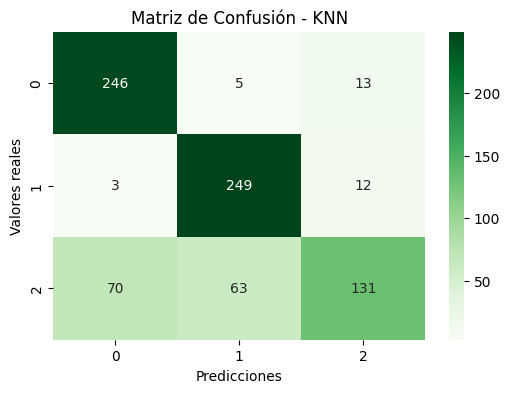

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión KNN")
plt.show()

In [ ]:
k_values = range(1, 21)
results = []

for k in k_values:
    t_knn = KNeighborsClassifier(n_neighbors=k,weights="distance", metric="euclidean")
    t_knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")  

    results.append({"k": k, "accuracy": accuracy, "macro_f1": macro_f1})

res_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False)
print("Resultados por k -accuracy-):\n", res_df)

#Mejor valor
mejor_k = int(res_df.iloc[0]["k"])
print(f"\nMejor k según accuracy: {mejor_k}")

knn_best = KNeighborsClassifier(n_neighbors=mejor_k, weights="distance", metric="euclidean")
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

print("\nMejor k por accuracy:\n", classification_report(y_test, y_pred_best, target_names=labelenc.classes_))
print("Matriz de confusión - Mejor k:\n", confusion_matrix(y_test, y_pred_best))

Resultados por k (ordenado por accuracy):
      k  accuracy  macro_f1
0    1  0.790404  0.774954
1    2  0.790404  0.774954
2    3  0.790404  0.774954
3    4  0.790404  0.774954
4    5  0.790404  0.774954
5    6  0.790404  0.774954
6    7  0.790404  0.774954
7    8  0.790404  0.774954
8    9  0.790404  0.774954
9   10  0.790404  0.774954
10  11  0.790404  0.774954
11  12  0.790404  0.774954
12  13  0.790404  0.774954
13  14  0.790404  0.774954
14  15  0.790404  0.774954
15  16  0.790404  0.774954
16  17  0.790404  0.774954
17  18  0.790404  0.774954
18  19  0.790404  0.774954
19  20  0.790404  0.774954

Mejor k según accuracy: 1

Reporte de clasificación (mejor k por accuracy):
               precision    recall  f1-score   support

        alta       0.89      0.97      0.92       264
        baja       0.93      1.00      0.96       264
       media       0.95      0.80      0.87       264

    accuracy                           0.92       792
   macro avg       0.92      0.92      0

In [ ]:
k_values = list(range(1, 21))
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

print(len(k_values), len(results))

20 20


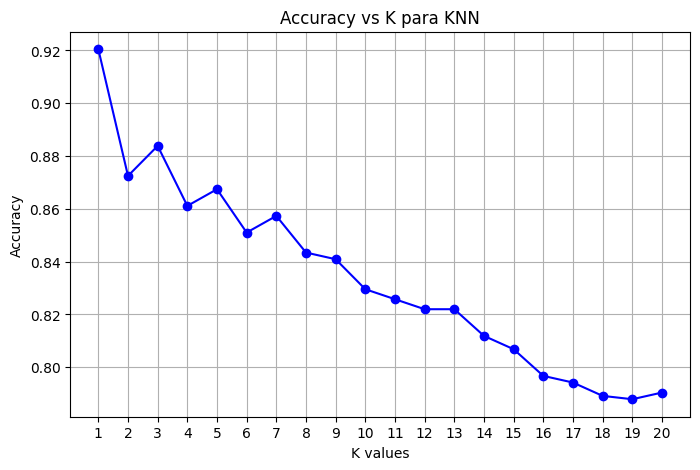

In [ ]:
res_df = pd.DataFrame({"K": k_values, "Accuracy": results})

plt.figure(figsize=(8,5))
plt.plot(res_df["K"], res_df["Accuracy"], "o-", color="green")
plt.xticks(k_values)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K para KNN")
plt.grid(True)
plt.show()